In [1]:
import math
import numpy as np 
import pandas as pd
from scipy import stats
import os

matches = pd.read_csv('matches.csv')
#deliveries = pd.read_csv('deliveries.csv')

In [2]:
print(f'Number of rows    = {len(matches)}')
print(f'Number of columns = {len(matches.columns)}')
matches.head()

Number of rows    = 756
Number of columns = 18


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
win_by_runs_data = matches[matches['win_by_runs'] > 0].win_by_runs
print(f'Number of rows = {len(win_by_runs_data)}')
win_by_runs_data.head()

Number of rows = 337


0     35
4     15
8     97
13    17
14    51
Name: win_by_runs, dtype: int64

In [4]:
win_by_runs_rows = len(win_by_runs_data) #No. of values in the set (n)
win_by_runs_sum = sum(win_by_runs_data) #Sum of all numbers

print(f'Sum of all numbers = {win_by_runs_sum}, No. of values in the set = {win_by_runs_rows}')

win_by_runs_arithmetic_mean = win_by_runs_sum / win_by_runs_rows #calculating arithmetic mean
print(f'Arithmetic mean = {win_by_runs_arithmetic_mean}')

Sum of all numbers = 10042, No. of values in the set = 337
Arithmetic mean = 29.798219584569733


In [5]:
win_by_runs_arithmetic_mean_verify = win_by_runs_data.mean()
print(f'Arithmetic mean (verify) = {win_by_runs_arithmetic_mean_verify}')

Arithmetic mean (verify) = 29.798219584569733


In [6]:
win_by_runs_10 = list(win_by_runs_data[:10])
print(win_by_runs_10)
print(sorted(win_by_runs_10))

[35, 15, 97, 17, 51, 27, 5, 21, 15, 14]
[5, 14, 15, 15, 17, 21, 27, 35, 51, 97]


In [7]:
win_by_runs_10_median = win_by_runs_data[:10].median()
print(f'Median (first 10) = {win_by_runs_10_median}')

win_by_runs_median = win_by_runs_data.median()
print(f'Median = {win_by_runs_median}')

Median (first 10) = 19.0
Median = 22.0


In [9]:
# Retrieve frequency (sorted, descending order)
win_by_runs_data.value_counts(sort=True, ascending=False).head()

14    13
10    11
4     11
1     10
13     9
Name: win_by_runs, dtype: int64

In [10]:
win_by_runs_data_mode = win_by_runs_data.mode()
print(f'Mode = {list(win_by_runs_data_mode)}')

Mode = [14]


In [12]:
win_by_runs_max = win_by_runs_data.max()
win_by_runs_min = win_by_runs_data.min()
win_by_runs_range = win_by_runs_max - win_by_runs_min

print(f'Largest = {win_by_runs_max}, Smallest = {win_by_runs_min}, Range = {win_by_runs_range}')

Largest = 146, Smallest = 1, Range = 145


In [15]:
win_by_runs_25_perc = stats.scoreatpercentile(win_by_runs_data, 25)
win_by_runs_75_perc = stats.scoreatpercentile(win_by_runs_data, 75)

win_by_runs_iqr = stats.iqr(win_by_runs_data)
print(f'Q1 (25th percentile) = {win_by_runs_25_perc}')
print(f'Q3 (75th percentile) = {win_by_runs_75_perc}')
print(f'IQR = Q3 - Q1 = {win_by_runs_75_perc} - {win_by_runs_25_perc} = {win_by_runs_iqr}')

Q1 (25th percentile) = 11.0
Q3 (75th percentile) = 39.0
IQR = Q3 - Q1 = 39.0 - 11.0 = 28.0


In [16]:
win_by_runs_95_perc = stats.scoreatpercentile(win_by_runs_data, 95)
print(f'95th percentile = {win_by_runs_95_perc}')

95th percentile = 86.0


In [17]:
win_by_wickets_data = matches[matches.win_by_wickets > 0].win_by_wickets
print(f'Number of rows = {len(win_by_wickets_data)}')
win_by_wickets_data.head()

Number of rows = 406


1     7
2    10
3     6
5     9
6     4
Name: win_by_wickets, dtype: int64

In [19]:
# Step 1: calculate mean
win_by_wickets_mean = win_by_wickets_data.mean()
print(f'Mean = {win_by_wickets_mean}')

# Step 2: calculate numerator part - sum of (x-mean)
win_by_wickets_var_numerator = sum([(x - win_by_wickets_mean) ** 2 for x in win_by_wickets_data])

# Step 3: calculate variance
win_by_wickets_variance = win_by_wickets_var_numerator / len(win_by_wickets_data)
print(f'Variance = {win_by_wickets_variance}')

# Step 4: calculate standard deviation
win_by_wickets_standard_deviation = math.sqrt(win_by_wickets_variance)
print(f'Standard deviation = {win_by_wickets_standard_deviation}')

Mean = 6.238916256157635
Variance = 3.3246924215583893
Standard deviation = 1.8233739116150558


In [20]:
win_by_wickets_standard_deviation_verify = win_by_wickets_data.std(ddof = 0)
print(f'Standard deviation = {win_by_wickets_standard_deviation_verify}')

Standard deviation = 1.823373911615058


In [21]:
win_by_runs_std = win_by_runs_data.std(ddof = 0)
print(f'| Mean = {win_by_runs_arithmetic_mean} | Median = {win_by_runs_median} |')
print(f'| Standard deviation = {win_by_runs_std} | IQR = {win_by_runs_iqr} |')

| Mean = 29.798219584569733 | Median = 22.0 |
| Standard deviation = 27.241108256199244 | IQR = 28.0 |


<AxesSubplot:>

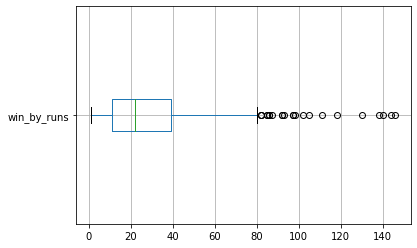

In [22]:
win_by_runs_data.to_frame().boxplot(vert=False)